<center>
<font size='7' style="color:#0D47A1">  <b>PREPROCESSING</b> </font>
</center>

<br>

In [1]:
# Let's start by importing basic labraries

#--------------------NUMERICS AND DATASCIENCE--------------------#
import numpy as np
import pandas as pd
#----------------------------------------------------------------#



#--------------------PLOTTING--------------------#
import matplotlib.pyplot as plt
#----------------------------------------------------------------#




In [2]:
# Here we will read the preprocessing dataset

dataset = pd.read_csv('preprocessing.csv')


In [3]:
# Lets take a look at the data

dataset


,State,Age,Salary,Savings
0,Texas,25,41000,5000
1,Florida,55,125000,41000
2,California,44,85000,11000
3,Florida,34,56000,10000
4,California,27,70000,9500
5,Texas,31,90000,12000
6,Florida,31,55000,13000
7,Texas,29,58000,55000
8,California,31,70000,5000
9,Texas,47,80000,7000


As you may spect, the goal for this taks is to predict the savings of a given person based on its state, age and salary. Let's plot the "target" variable as function of the feature variables. 

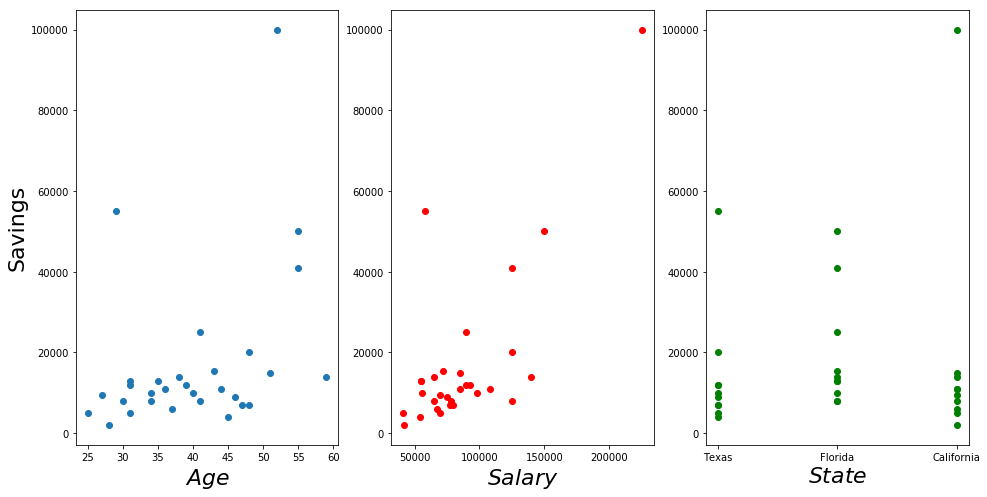

In [4]:
# Here we define a figure the specified dimensions

plt.figure(figsize=(16,8))


# From now on we will treat each plot as a subplot


#--------------------FIRST PLOT----------------------#
ax1 = plt.subplot(1, 3, 1)

plt.xlabel(r'$Age$',fontsize=22)
plt.ylabel(r'Savings',fontsize=22)

plt.scatter(data=dataset, x='Age', y='Savings')
#--------------------FIRST PLOT----------------------#



#--------------------SECOND PLOT---------------------#
ax2 = plt.subplot(1, 3, 2)

plt.xlabel(r'$Salary$',fontsize=22)

plt.scatter(data=dataset, x='Salary', y='Savings', c='r')
#--------------------SECOND PLOT---------------------#



#--------------------THIRD PLOT----------------------#
ax3 = plt.subplot(1, 3, 3)

plt.xlabel(r'$State$',fontsize=22)

plt.scatter(data=dataset, x='State', y='Savings', c='g')
#--------------------THIRD PLOT----------------------#



plt.show()

Take a look a t the plot. What sort of information each of the subplots give you? Is it redundant? Or do each of them gives complementary information to whole picture? How can we be sure? 

Maybe looking at the actual statistic helps you to delineate a more precise picture. 

In [5]:
# Now lets take a look at the statistics of the dataset and see if we can get a better picture of the problem

dataset.describe()


,Age,Salary,Savings
count,30.00000,30.000000,30.000000
mean,40.00000,87300.000000,17333.333333
std,9.22889,38237.145688,20094.746840
min,25.00000,41000.000000,2000.000000
25%,31.75000,65000.000000,8000.000000
50%,39.50000,77500.000000,11000.000000
75%,46.75000,96750.000000,14750.000000
max,59.00000,225000.000000,100000.000000


With this information we can make a few observations: 

 * Age and Salary seem to predict a linear beheavior when predicting savings (As one may spect). 
 * The state feature seems to cluster people with very similar saving trends. 
 * We face the problem of mix type for the features. Two continuos ones: Age and Salary. One categorical: State. And we have to use this information to predict continous target variable. 
 * Even more, the numerical features present different magnitudes and distribution of their data. 
 
At this point you have two choices:

 1. Take the numerical feature variable with the highets correlation to predict savings. A simple linear regression.
 
 2. Find a way to condensed all the information that you have at hand and make a more precise prediction. A multilinear regression. 
 

The second option is the idea behind multilinear regression. A topic we will cover later. For now, we will just focus on processing the data for ist later use. 

In the cell below, try to reproduce the plots above but this time with a line of tendency. For the state variable, you can not make a linear regression per se, right? Any ideas on what could you do? 

In [6]:
# INSERT YOUR CODE HERE

<br>
<br>
<br>
<font size='6' style="color:#00A6D6">  <b>Dependent and independent variables splitting</b> </font>

In [7]:
# Here we will allocate the independent variables in a separate array call "X"

X = dataset.iloc[:, :-1].values


In [8]:
X

array([['Texas', 25, 41000],
       ['Florida', 55, 125000],
       ['California', 44, 85000],
       ['Florida', 34, 56000],
       ['California', 27, 70000],
       ['Texas', 31, 90000],
       ['Florida', 31, 55000],
       ['Texas', 29, 58000],
       ['California', 31, 70000],
       ['Texas', 47, 80000],
       ['Florida', 41, 65000],
       ['Florida', 41, 90000],
       ['Texas', 48, 125000],
       ['California', 52, 225000],
       ['California', 30, 125000],
       ['California', 38, 140000],
       ['Texas', 48, 77000],
       ['Florida', 59, 65000],
       ['California', 37, 67000],
       ['Florida', 43, 72000],
       ['California', 51, 85000],
       ['Texas', 46, 75000],
       ['California', 28, 42000],
       ['Texas', 40, 98000],
       ['Florida', 34, 78000],
       ['Texas', 45, 54000],
       ['Florida', 35, 55000],
       ['Texas', 39, 93000],
       ['California', 36, 108000],
       ['Florida', 55, 150000]], dtype=object)

In [9]:
# We allocate the dependent variable here on its own array "y"

y = dataset.iloc[:,3].values
y


array([  5000,  41000,  11000,  10000,   9500,  12000,  13000,  55000,
         5000,   7000,   8000,  25000,  20000, 100000,   8000,  14000,
         7000,  14000,   6000,  15500,  15000,   9000,   2000,  10000,
         8000,   4000,  13000,  12000,  11000,  50000])

<br>
<br>
<br>
<font size='6' style="color:#00A6D6">  <b>Using Scikit-learn to Preprocess the data</b> </font>

In [10]:
# Here we use the Scikitlearn library to create "objects" that will do all the dirty work for us

from sklearn.preprocessing import Imputer


In [11]:
# Here we create the object that will take care of all missing values 
# by replacing them with the mean of all values.

imputer = Imputer(missing_values= 'NaN', strategy='mean', axis=0)


In [12]:
# In this line we fit the imputer object in the X array

imputer = imputer.fit(X[ : , 1:2])

In [13]:
# Update the array

X[ : , 1:2] = imputer.transform(X[ : , 1:2])

In [14]:
# Final form

X

array([['Texas', 25.0, 41000],
       ['Florida', 55.0, 125000],
       ['California', 44.0, 85000],
       ['Florida', 34.0, 56000],
       ['California', 27.0, 70000],
       ['Texas', 31.0, 90000],
       ['Florida', 31.0, 55000],
       ['Texas', 29.0, 58000],
       ['California', 31.0, 70000],
       ['Texas', 47.0, 80000],
       ['Florida', 41.0, 65000],
       ['Florida', 41.0, 90000],
       ['Texas', 48.0, 125000],
       ['California', 52.0, 225000],
       ['California', 30.0, 125000],
       ['California', 38.0, 140000],
       ['Texas', 48.0, 77000],
       ['Florida', 59.0, 65000],
       ['California', 37.0, 67000],
       ['Florida', 43.0, 72000],
       ['California', 51.0, 85000],
       ['Texas', 46.0, 75000],
       ['California', 28.0, 42000],
       ['Texas', 40.0, 98000],
       ['Florida', 34.0, 78000],
       ['Texas', 45.0, 54000],
       ['Florida', 35.0, 55000],
       ['Texas', 39.0, 93000],
       ['California', 36.0, 108000],
       ['Florida', 55.0, 15

For proper description of the methods of this library read the following page: 

 * https://scikit-learn.org/stable/modules/preprocessing.html
 

<br>
<br>
<br>
<font size='6' style="color:#00A6D6">  <b>Categorical Data</b> </font>

In this section we will take a look at two different approaches to deal with categorical data: Label Encoder and One Hot Encoder. Take a look at the following post:

 * https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/-
 
And this section: 

 * https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features

In [15]:
# Import the methods from the library

from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [16]:
# Create a object to do the label encoding

labelencoder_X = LabelEncoder()


In [17]:
# Apply the method to the array

X[ : , 0] = labelencoder_X.fit_transform(X[ : , 0])
X

array([[2, 25.0, 41000],
       [1, 55.0, 125000],
       [0, 44.0, 85000],
       [1, 34.0, 56000],
       [0, 27.0, 70000],
       [2, 31.0, 90000],
       [1, 31.0, 55000],
       [2, 29.0, 58000],
       [0, 31.0, 70000],
       [2, 47.0, 80000],
       [1, 41.0, 65000],
       [1, 41.0, 90000],
       [2, 48.0, 125000],
       [0, 52.0, 225000],
       [0, 30.0, 125000],
       [0, 38.0, 140000],
       [2, 48.0, 77000],
       [1, 59.0, 65000],
       [0, 37.0, 67000],
       [1, 43.0, 72000],
       [0, 51.0, 85000],
       [2, 46.0, 75000],
       [0, 28.0, 42000],
       [2, 40.0, 98000],
       [1, 34.0, 78000],
       [2, 45.0, 54000],
       [1, 35.0, 55000],
       [2, 39.0, 93000],
       [0, 36.0, 108000],
       [1, 55.0, 150000]], dtype=object)

In [18]:
# Here we create another obejct for the One Hot Encoder

onehotencoder = OneHotEncoder(categorical_features= [0])

In [19]:
# Apply it to the array

X = onehotencoder.fit_transform(X).toarray()

In [20]:
# Take a look at the output

X

array([[0.00e+00, 0.00e+00, 1.00e+00, 2.50e+01, 4.10e+04],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.50e+01, 1.25e+05],
       [1.00e+00, 0.00e+00, 0.00e+00, 4.40e+01, 8.50e+04],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.40e+01, 5.60e+04],
       [1.00e+00, 0.00e+00, 0.00e+00, 2.70e+01, 7.00e+04],
       [0.00e+00, 0.00e+00, 1.00e+00, 3.10e+01, 9.00e+04],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.10e+01, 5.50e+04],
       [0.00e+00, 0.00e+00, 1.00e+00, 2.90e+01, 5.80e+04],
       [1.00e+00, 0.00e+00, 0.00e+00, 3.10e+01, 7.00e+04],
       [0.00e+00, 0.00e+00, 1.00e+00, 4.70e+01, 8.00e+04],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.10e+01, 6.50e+04],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.10e+01, 9.00e+04],
       [0.00e+00, 0.00e+00, 1.00e+00, 4.80e+01, 1.25e+05],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.20e+01, 2.25e+05],
       [1.00e+00, 0.00e+00, 0.00e+00, 3.00e+01, 1.25e+05],
       [1.00e+00, 0.00e+00, 0.00e+00, 3.80e+01, 1.40e+05],
       [0.00e+00, 0.00e+00, 1.00e+00, 4.80e+01, 7.70e+04

Describe the differences beetween the two methods.

Why do you think those differences would make a difference? 


<br>
<br>
<br>
<font size='6' style="color:#00A6D6">  <b>Splitting the dataset</b> </font>

In [21]:
# Scikitlearn can split the dataset into the training and test parts for us. 

from sklearn.model_selection import train_test_split

In [22]:
# Here we split into two and one thirds the datasets to create the test and train sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 1/3, random_state= 0)

In [24]:
# Look at different created sets here

X_test

array([[1.00e+00, 0.00e+00, 0.00e+00, 4.40e+01, 8.50e+04],
       [1.00e+00, 0.00e+00, 0.00e+00, 3.60e+01, 1.08e+05],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.20e+01, 2.25e+05],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.10e+01, 6.50e+04],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.50e+01, 5.50e+04],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.40e+01, 7.80e+04],
       [0.00e+00, 0.00e+00, 1.00e+00, 3.90e+01, 9.30e+04],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.10e+01, 9.00e+04],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.90e+01, 6.50e+04],
       [1.00e+00, 0.00e+00, 0.00e+00, 2.80e+01, 4.20e+04]])

<br>
<br>
<br>
<font size='6' style="color:#00A6D6">  <b>Feature Scaling</b> </font>

The machine learning algorithms used here, are gonna try to find the most optimal linear combination of features to make predictions; however, some features may have more weight simply because their numerical values are way bigger than other ones. In order to solve this bias, we can scale our features. For more information read the following post: 

 * https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e


In [25]:
# Here we export the Standar Scaler method

from sklearn.preprocessing import StandardScaler

In [26]:
# We initiate the method creating a object for him

sc_x = StandardScaler()

In [27]:
# Finally we apply the method on the set and update it

X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [28]:
X_train

array([[-0.65465367, -0.57735027,  1.1055416 , -0.9217157 ,  0.14212897],
       [-0.65465367, -0.57735027,  1.1055416 ,  0.9109354 , -0.28262428],
       [ 1.52752523, -0.57735027, -0.90453403, -0.9217157 , -0.51133757],
       [ 1.52752523, -0.57735027, -0.90453403, -1.02951871,  1.28569543],
       [-0.65465367, -0.57735027,  1.1055416 ,  0.04851135,  0.40351559],
       [ 1.52752523, -0.57735027, -0.90453403,  1.23434442, -0.02123766],
       [-0.65465367,  1.73205081, -0.90453403,  1.66555644,  1.28569543],
       [-0.65465367,  1.73205081, -0.90453403,  1.66555644,  2.10252862],
       [-0.65465367,  1.73205081, -0.90453403, -0.9217157 , -1.00143749],
       [ 1.52752523, -0.57735027, -0.90453403, -1.35292773, -0.51133757],
       [ 1.52752523, -0.57735027, -0.90453403, -0.27489767, -0.60935756],
       [-0.65465367,  1.73205081, -0.90453403,  0.37192037, -0.44599092],
       [-0.65465367, -0.57735027,  1.1055416 ,  0.8031324 , -0.1846043 ],
       [-0.65465367, -0.57735027,  1.1